In [2]:
# An initializer for the bias vector. If None, the default initializer will be used.# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['images', 'digit-recognizer']


**Goal**: The goal of this competition is to recognize handwritten single digit image.

**Datasets**: The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.



**Import the required packages**...

In [3]:
import tensorflow as tf  
import matplotlib.pyplot as plot

**Read train and test dataset**...

In [4]:
trainDF = pd.read_csv('../input/digit-recognizer/train.csv')
testDF = pd.read_csv('../input/digit-recognizer/test.csv')

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.
It cotains data of 42K images

The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.

In [5]:
print(trainDF.shape, testDF.shape)

(42000, 785) (28000, 784)


First 10 images from train datasets, And labels associated with those images

Note: There are two main options to achieve the selection and indexing activities in Pandas(.iloc, .loc, .ix)
1.  *.iloc* - data.iloc[<row selection>, <column selection>] -- integer location based indexing or selection <br/>
    e.g. data.iloc[:,0] data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns. <br/>
2. *.loc* -  data.loc[<row selection>, <column selection>] -- either label/index or boolean / conditional lookup based indexing <br/>
    e.g.  data.loc[['Anusha', 'Priti']],
            data.loc[['Anusha', 'Priti'], [First_name, Address, City]]
    
The .ix indexer has been deprecated in recent versions of Pandas, starting with version 0.20.1

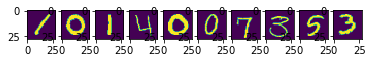

[1, 0, 1, 4, 0, 0, 7, 3, 5, 3]


In [6]:
X_train = trainDF.iloc[:,1:]
for i in range(10) :
    plot.subplot(1,10,i+1)
    plot.imshow(X_train.values[i].reshape(28,28))
    
plot.show()

print((trainDF.iloc[0:10, 0]).tolist())

First 10 images from test datasets

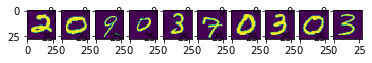

In [7]:
for i in range(10) :
    plot.subplot(1,10,i+1)
    plot.imshow(testDF.values[i].reshape(28,28))
    
plot.show()

Prepare the **One-hot vector** for labels...<br/>
e.g. 0 0 1 0 0 0 0 0 0 0 <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1 0 0 0 0 0 0 0 0 0<p/>

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. Problem with label encoding is that it assumes higher the categorical value, better the category



In [8]:
trainLabels = trainDF['label'].tolist()
ohTrainLabelsTensor = tf.one_hot(trainLabels, depth=10)
lblTrainArr = tf.Session().run(tf.cast(ohTrainLabelsTensor, tf.float32))

- **Method** for solving the problem...
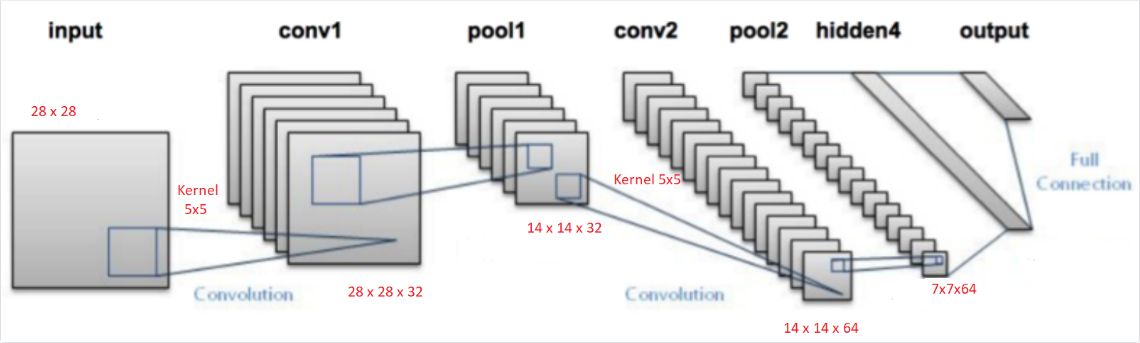


Use tf.placeholder variables (dummy nodes that provide entry points for data to computational graph)<br/><br/>

**tf.placeholder**(  <br/>
    **dtype**, &nbsp;&nbsp;&nbsp;&nbsp;#The type of elements in the tensor to be fed<br/>
    **shape**=None,&nbsp;&nbsp;&nbsp;&nbsp;#The shape of the tensor to be fed (optional). If the shape is not specified, you can feed a tensor of any shape.<br/>
    **name**=None&nbsp;&nbsp;&nbsp;&nbsp;#A name for the operation (optional).<br/>
)<br/>
<br/>
**Important**: This tensor will produce an error if evaluated. Its value must be fed using the feed_dict optional argument to Session.run(), Tensor.eval(), or Operation.run().

In [9]:
#Variables
num_input = 28*28*1 #img shape (28*28)
num_classes = 10 ##total classes (0-9 digits)

#placeholders are used to send and get information from graph
x_ = tf.placeholder("float", shape=[None, num_input], name='X')
y_ = tf.placeholder("float", shape=[None, num_classes], name='Y')

is_training = tf.placeholder(tf.bool) #Add dropout to fully connected layer

#Four values in 1D array. <br/>
**values = [1, 2, 3, 4]** <br/>
#use reshape to change flat 1D array to 2D array. <br/>
**result = tf.reshape(values, [2, 2])** <br/>

**print(tf.Session().run(result))** <br/><br/>

Output: <br/><br/>

[[1 2] <br/>
 [3 4]]<br/>

In [10]:
#convert the feature vector to 28*28*1 image
x_image = tf.reshape(x_, [-1,28,28,1])  ## -1 represents here variable size of batches

tf.layers.conv2d( <br/>
    inputs, <br/>
    filters,<br/>
    kernel_size, <br/>
    strides=(1, 1), <br/>
    padding='valid', <br/>
    data_format='channels_last', <br/>
    dilation_rate=(1, 1), ##https://towardsdatascience.com/understanding-2d-dilated-convolution-operation-with-examples-in-numpy-and-tensorflow-with-d376b3972b25<br/>
    activation=None, <br/>
    use_bias=True, <br/>
    kernel_initializer=None, <br/>
    bias_initializer=tf.zeros_initializer(),<br/>
    kernel_regularizer=None,<br/>
    bias_regularizer=None,<br/>
    activity_regularizer=None,<br/>
    kernel_constraint=None,<br/>
    bias_constraint=None,<br/>
    trainable=True,<br/>
    name=None,<br/>
    reuse=None<br/>
)

In [45]:
#convolution layer 1
conv1 = tf.layers.conv2d(inputs=x_image, 
                         filters=32, 
                         kernel_size=[5, 5], 
                         padding="same", 
                         activation=tf.nn.relu)

print(conv1.shape)

(?, 28, 28, 32)


tf.layers.max_pooling2d( <br/>
    inputs, <br/>
    pool_size,<br/>
    strides,<br/>
    padding='valid',<br/>
    data_format='channels_last',<br/>
    name=None<br/>
)

In [46]:
#pooling layer 1
pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], strides=2)
print(pool1.shape)

(?, 14, 14, 32)


In [47]:
#convolution layer 2
conv2 = tf.layers.conv2d(inputs=pool1, 
                         filters=64, 
                         kernel_size=[5, 5], 
                         padding="same", 
                         activation=tf.nn.relu)

print(conv2.shape)

(?, 14, 14, 64)


In [48]:
pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], strides=2)
print(pool2.shape)

(?, 7, 7, 64)


In [15]:
pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

tf.layers.dense( <br/>
    inputs, <br/>
    units, <br/>
    activation=None, <br/>
    use_bias=True, <br/>
    kernel_initializer=None, <br/>
    bias_initializer=tf.zeros_initializer(), <br/>
    kernel_regularizer=None, <br/>
    bias_regularizer=None, <br/>
    activity_regularizer=None, <br/>
    kernel_constraint=None, <br/>
    bias_constraint=None, <br/>
    trainable=True, <br/>
    name=None, <br/>
    reuse=None <br/>
)

In [49]:
dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
print(dense.shape)

(?, 1024)


https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

tf.layers.dropout( <br/>
    inputs, <br/>
    rate=0.5,<br/>
    noise_shape=None,<br/>
    seed=None,<br/>
    training=False,<br/>
    name=None<br/>
)

In [ ]:
dropout = tf.layers.dropout(inputs=dense, rate=0.4, training=is_training)

In [18]:
logits = tf.layers.dense(inputs=dropout, units=10)

https://stackoverflow.com/questions/34240703/what-is-logits-softmax-and-softmax-cross-entropy-with-logits

Suppose you have two tensors, where y_hat contains computed scores for each class (for example, from y = W*x +b) and y_true contains one-hot encoded true labels. <br/>

y_hat  = ... # Predicted label, <br/>
y_true = ... # True label, one-hot encoded<br/>
If you interpret the scores in y_hat as unnormalised log probabilities, then they are logits.<br/>

Additionally, the total cross-entropy loss computed in this manner:<br/>

y_hat_softmax = tf.nn.softmax(y_hat)<br/>
total_loss = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(y_hat_softmax), [1]))<br/>
is essentially equivalent to the total cross-entropy loss computed with the function softmax_cross_entropy_with_logits():<br/>

total_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_hat, y_true))

In [19]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_))

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [20]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [21]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_,1))

In [22]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
init = tf.global_variables_initializer()

In [24]:
sess = tf.Session()

In [25]:
sess.run(init)

In [26]:
Y = tf.nn.softmax(logits)
predictions = tf.argmax(Y, 1)

In [27]:
for i in range (10000) :
    startIndx = (i * 50) %2000
    endIndx = startIndx + 50
    batch_train = trainDF[startIndx : endIndx] 
    batch_test = testDF[startIndx : endIndx]
    
    batch_label_train =  lblTrainArr[startIndx : endIndx]
    batch_image_train =  batch_train.loc[:, batch_train.columns != 'label']
        
    
    if i % 50 == 0:
        train_accuracy = accuracy.eval(session = sess, feed_dict={x_ : batch_image_train, y_ : batch_label_train, is_training:True})
        print("step %d, training accuracy %g" %(i, train_accuracy))
        train_step.run(session=sess, feed_dict={x_ : batch_image_train, y_ : batch_label_train, is_training:True})
        

    if i % 100 == 0:
        test_accuracy = accuracy.eval(session = sess, feed_dict={x_ : batch_test, y_ : batch_label_train, is_training:False})
        print("step %d, test_accuracy %g" %(i, train_accuracy))

step 0, training accuracy 0.12
step 0, test_accuracy 0.12
step 50, training accuracy 0.1
step 100, training accuracy 0.22
step 100, test_accuracy 0.22
step 150, training accuracy 0.22
step 200, training accuracy 0.38
step 200, test_accuracy 0.38
step 250, training accuracy 0.32
step 300, training accuracy 0.3
step 300, test_accuracy 0.3
step 350, training accuracy 0.44
step 400, training accuracy 0.44
step 400, test_accuracy 0.44
step 450, training accuracy 0.48
step 500, training accuracy 0.48
step 500, test_accuracy 0.48
step 550, training accuracy 0.52
step 600, training accuracy 0.56
step 600, test_accuracy 0.56
step 650, training accuracy 0.52
step 700, training accuracy 0.54
step 700, test_accuracy 0.54
step 750, training accuracy 0.64
step 800, training accuracy 0.7
step 800, test_accuracy 0.7
step 850, training accuracy 0.52
step 900, training accuracy 0.74
step 900, test_accuracy 0.74
step 950, training accuracy 0.72
step 1000, training accuracy 0.82
step 1000, test_accuracy 0

step 8650, training accuracy 1
step 8700, training accuracy 1
step 8700, test_accuracy 1
step 8750, training accuracy 0.98
step 8800, training accuracy 0.98
step 8800, test_accuracy 0.98
step 8850, training accuracy 1
step 8900, training accuracy 0.98
step 8900, test_accuracy 0.98
step 8950, training accuracy 1
step 9000, training accuracy 0.98
step 9000, test_accuracy 0.98
step 9050, training accuracy 1
step 9100, training accuracy 1
step 9100, test_accuracy 1
step 9150, training accuracy 1
step 9200, training accuracy 0.96
step 9200, test_accuracy 0.96
step 9250, training accuracy 0.98
step 9300, training accuracy 1
step 9300, test_accuracy 1
step 9350, training accuracy 1
step 9400, training accuracy 0.98
step 9400, test_accuracy 0.98
step 9450, training accuracy 1
step 9500, training accuracy 0.98
step 9500, test_accuracy 0.98
step 9550, training accuracy 1
step 9600, training accuracy 1
step 9600, test_accuracy 1
step 9650, training accuracy 1
step 9700, training accuracy 0.98
ste

In [28]:
prediction = sess.run(tf.argmax(logits,1), feed_dict={x_: testDF, is_training:False})
print ("Prediction for test image:", np.squeeze(prediction))

Prediction for test image: [2 0 9 ... 3 9 2]


In [44]:
ids = list(range(prediction.shape[0]))

sub = pd.DataFrame({
    "ImageId": ids,
    "Label": np.squeeze(prediction)
})

sub.to_csv("./submission.csv", index=False)